# Sistemas Computacionais e Reconhecimento de Imagens

## Aula 1 (Processamento de Imagens Digitais)
1. Introdução
  - Conceitos básicos de uma imagem digital
    - Etapas do Processamento de Imagens Digitais
    - Modelo de uma imagem digital
    - Exemplos de aplicações
2. Fundamentos de imagens digitais
  - Representação
    - Domínio espacial, espaço de cor (RGB), pixels e valor de intensidade
  - Relações básicas entre pixels
    - Vizinhança 
    - Interpolação 
    - Conectividade
    - Regiões
    - Fronteiras
    - Segmentação
    - Medidas de distância
  - Operações matemáticas básicas utilizadas
    - Operações aritméticas


# Introdução
## Etapas do Processamento de Imagens Digitais
![](images/steps.png)


# Introdução
## Modelo de uma imagem digital
![](images/lena_f.png)

# Introdução
## Exemplos de aplicações
 - ### Imagem de raios gama
 - ### Imagem de raio x
 - ### Imagem em ultra-violeta
 - ### Imagem infravermelha
 - ### Imagem em banda de mircoondas
 - ### Imagem em banda de radio

# Fundamentos de imagens digitais
## Representação
 - ### Domínio espacial, espaço de cor (RGB), pixels e valor de intensidade

In [78]:
# Instalando e importando bibliotecas

# !pip3 install opencv-python
# !pip3 install matplotlib
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

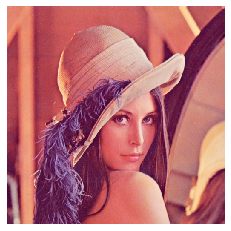

In [79]:
# Lendo imagem

img = cv2.imread('images/lena.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(rgb_img)

In [99]:
# valores de intensidade dos pixels da imagem

R = pd.DataFrame(rgb_img[0])
G = pd.DataFrame(rgb_img[1]) 
B = pd.DataFrame(rgb_img[1]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
pd.concat([R, G, B], axis = 1)
[]

[]

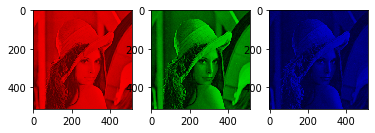

In [81]:
# imagens separadas por canal

red = rgb_img.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = rgb_img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = rgb_img.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

imgs = [red, green, blue]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()
 

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Vizinhança
    - #### Um pixel na coordenada `(x, y)` tem quatro vizinhos sendo horizontais e verticais cujas coordenadas são dadas por:
    `(x+1, y), (x-1, y), (x, y+1), (x, y-1)`
    
    ![](images/vizinhanca.jpg)

# Fundamentos de imagens digitais
## Relações básicas entre pixels
  - ### Interpolação
    - ### Sempre que ampliamos ou reduzimos uma imagem estamos trabalhando com interpolação 
    - ### Interpolação de imagens digitais é basicamente criar novos pixels a partir dos pixels já existentes.
    - ### Exemplo:
      - #### Interpolação Bilinear: 
      `g(u0) e g(u0+1), sendo u0=[x]`
    
      - #### O peso de cada ponto é proporcional à proximidade da posição continua x
      `ĝ(x)=g(u0)+(x-u0)*(g(u0+1)-g(u0)) = g(u0)*(1-(x-u0))+g(u0+1)*(x-u0)`
    

  ![](images/bilinear.png)

In [100]:
R = pd.DataFrame(red[0])
G = pd.DataFrame(green[0]) 
B = pd.DataFrame(blue[0]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
df_green = pd.concat([R, G, B], axis = 1)
df_green

[]

[]

In [101]:
rgb_img_resized = cv2.resize(rgb_img, (24, 24), interpolation=cv2.INTER_LINEAR)

print("img original: " + str(rgb_img.shape))
print("img redimensionada: " + str(rgb_img_resized.shape))

cv2.imshow('none', rgb_img)

R = pd.DataFrame(rgb_img_resized[0])
G = pd.DataFrame(rgb_img_resized[1]) 
B = pd.DataFrame(rgb_img_resized[1]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
pd.concat([R, G, B], axis = 1)

[]

img original: (512, 512, 3)
img redimensionada: (24, 24, 3)


[]

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Conectividade: A conectividade entre pixels estabelece quando estes estão conectados, quando possuem a mesma propriedade para pertencer à mesma região

 ![](images/conectividade.jpg)

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Regiões: Um grupo de pixels conectados com propriedades similares

 ![](images/region.jpg)

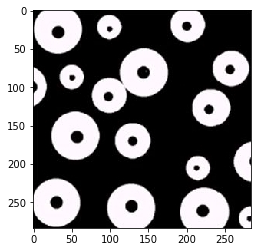

In [126]:
# exemplo preenchimento

img = cv2.imread('images/region_original.jpg')
plt.imshow(img)

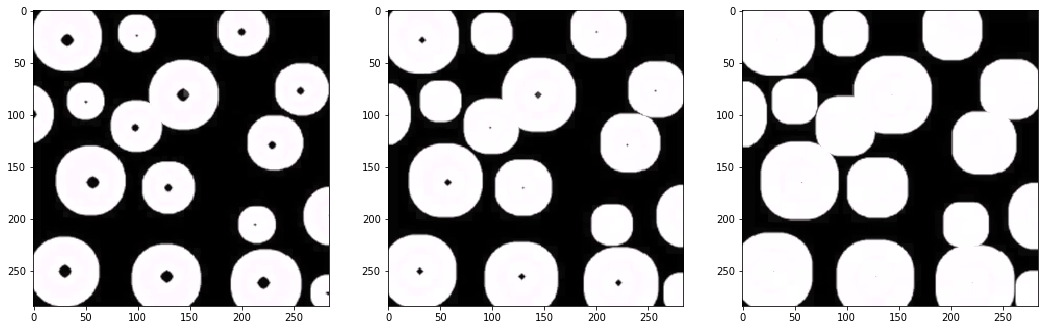

In [132]:
kernel = np.ones((5,5), np.uint8) 
img_dilation_1 = cv2.dilate(img, kernel, iterations=1) 
img_dilation_2 = cv2.dilate(img, kernel, iterations=2) 
img_dilation_3 = cv2.dilate(img, kernel, iterations=3) 

imgs = [img_dilation_1, img_dilation_2, img_dilation_3]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

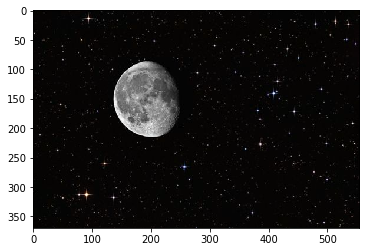

In [139]:
# exemplo remoção de estrelas 

img = cv2.imread('images/moon.jpg')

plt.imshow(img)

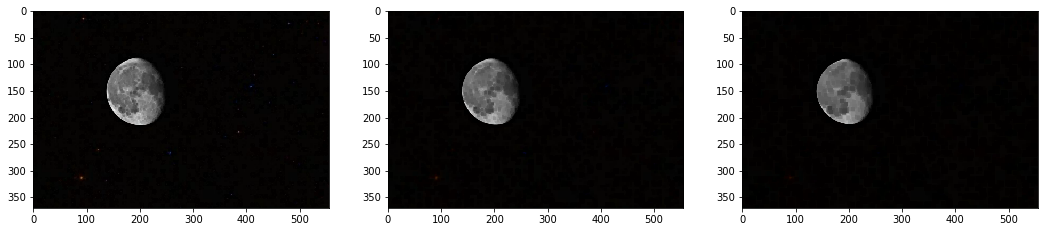

In [146]:
img = cv2.imread('images/moon.jpg')
kernel = np.ones((3,3), np.uint8) 
img_erosion_1 = cv2.erode(img, kernel, iterations=1) 
img_erosion_2 = cv2.erode(img, kernel, iterations=2) 
img_erosion_3 = cv2.erode(img, kernel, iterations=3) 

imgs = [img_erosion_1, img_erosion_2, img_erosion_3]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Fronteira (borda ou contorno): É o cunjunto de pixels que representa a borda de uma região

 ![](images/fronteira.jpg)

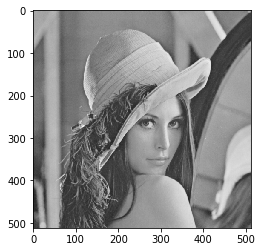

In [159]:
# detecção de fronteira 

img = cv2.imread('images/lena.png', 0)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

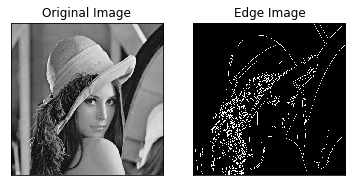

In [165]:
edges = cv2.Canny(rgb_img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Segmentação: processo de dividir uma imagem em múltiplas regiões (conjunto de pixels) ou objetos

 ![](images/segmentacao.jpg)

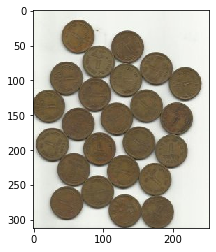

In [170]:
# exemplo segmentação de moedas

img = cv2.imread('images/coins.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

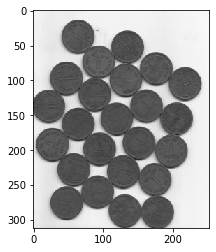

In [181]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_to_show = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray_to_show)

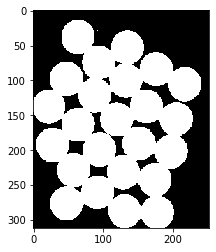

In [187]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh_to_show = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh_to_show)

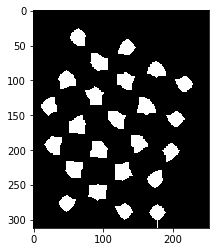

In [201]:
kernel = np.ones((3,3), np.uint8) 
thresh_eroded = cv2.erode(thresh, kernel, iterations=10)
thresh_eroded_to_show = cv2.cvtColor(thresh_eroded, cv2.COLOR_BGR2RGB)

plt.imshow(thresh_eroded_to_show)

In [206]:
contours,h = cv2.findContours(thresh_eroded,1,2)

len(contours)

24

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Medidas de distância: Similaridade entre pixels
 - ### Distância Euclidiana
 
 ![](images/distancia_euclidiana.jpg)



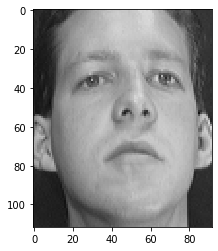

In [222]:
# exemplos comparação de faces simples

img_to_search = cv2.imread('images/face/N001_9.pgm')
plt.imshow(img_to_search)

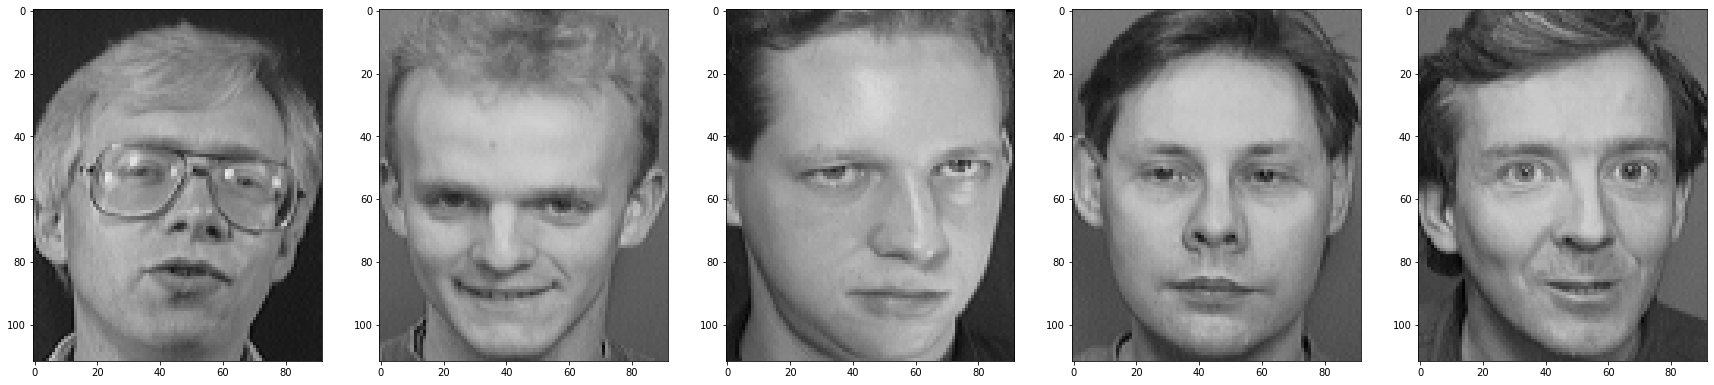

In [227]:
import os

face_imgs = []

directory = 'images/face/'

for filename in os.listdir(directory):
    if filename != "N001_9.pgm":
        face_imgs.append(cv2.imread(directory + filename))

fig = plt.figure()
for n, img in enumerate(face_imgs):
    fig.add_subplot(1, np.ceil(len(face_imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(face_imgs))
plt.show()

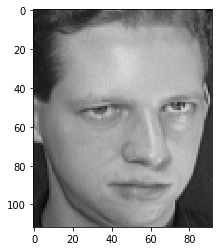

In [234]:
min_dist = float('inf')

for img in face_imgs:
    dist = cv2.norm(img, img_to_search, cv2.NORM_L2)
    if dist < min_dist:
        min_dist = dist
        img_target = img

plt.imshow(img_target)

# Fundamentos de imagens digitais
## Operações matemáticas básicas utilizadas
 - ### Operações aritméticas

| Operação      	| Efeito sobre a imagem                                                                                                                                                                            	| Aplicação                                               	|
|---------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|---------------------------------------------------------	|
| Adição        	| Z é o resultado da soma dos valores de intensidade de X e Y. Se Y for um escalar positivo, Z será uma versão mais clara de X; o acréscimo de intensidade será o próprio valor de Y.              	| Normalização de brilho de imagens  Remoção de ruídos    	|
| Subtração     	| Z é o resultado da diferença dos valores de intensidade de X e Y. Se Y for um escalar positivo, Z será uma versão mais escura de X; o decréscimo de intensidade será o próprio valor de Y.       	| Detecção de diferenças entre duas imagens da mesma cena 	|
| Divisão       	| Z é a razão dos valores de intensidade de X pelos valores correspondentes em Y. Se Y for um escalar positivo, os valores de intensidade de Z serão inversamente proporcionais a X por um fator Y 	| Normalização do brilho                                  	|
| Multiplicação 	| Z é o produto dos valores de intensidade de X e Y. Se Y for um escalar positivo, os valores de intensidade de Z serão diretamente proporcionais a X por um fator Y.                              	| Calibração de brilho                                    	|

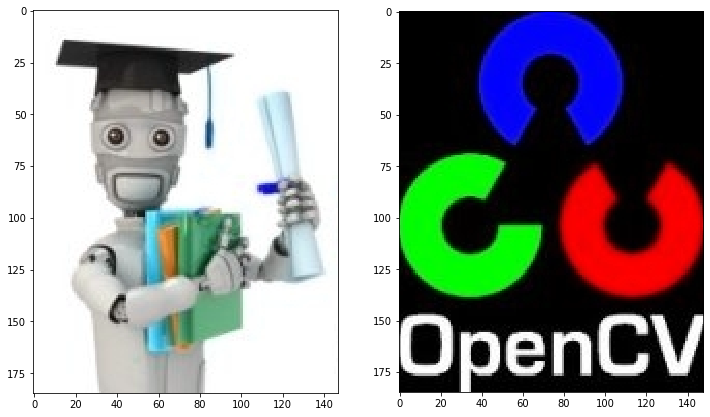

In [254]:
# exemplo adicionando uma marca dagua

robot = cv2.imread('images/robot.jpg')
opencv_logo = cv2.imread('images/opencv_logo.jpg')

imgs = [robot, opencv_logo]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

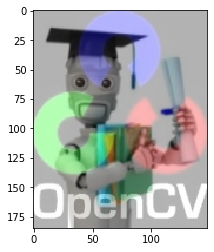

In [267]:
robot = cv2.resize(robot, (opencv_logo.shape[1],opencv_logo.shape[0]), fx=0.5, fy=0.5) 

dst = cv2.addWeighted(robot,0.7,opencv_logo,0.3,0)

plt.imshow(dst)